In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random
import numpy as np

#### 样本生成

In [28]:
# # 自定义类别数目和类别样本数
# class_num = 12
# sample_nums = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
# sam_np = np.array(sample_nums)
# # total_acc = 0.917 
# # 定义每个类别的准确率
# accuracies = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4]
# acc_np = np.array(accuracies)
# total_acc = (sum(acc_np*sam_np))/(sum(sam_np))
# print(total_acc)
# # 生成样本和预测结果
# x = []
# y = []
# for i in range(class_num):
#     # 样本数
#     num_samples = sample_nums[i]
#     # 准确率
#     acc = accuracies[i]
#     # 生成每个类别的样本和预测结果
#     for j in range(num_samples):
#         # 生成随机数
#         rand = random.uniform(0, 1)
#         # 判断随机数是否小于准确率
#         if rand < acc:
#             # 预测正确
#             y.append('C_' + str(i))
#         else:
#             # 预测错误
#             # 随机选择一个不是当前类别的类别作为预测结果
#             k = random.randint(0, class_num - 2)
#             if k >= i:
#                 k += 1
#             y.append('C_' + str(k))
#         # 添加样本到x
#         x.append([random.uniform(0, 1) for _ in range(10)])

# # 输出样本和预测结果的长度，用于检查是否生成正确
# print(len(x))
# print(len(y))


In [58]:
# 设置每个类别的总数和准确率

class_num = 13
num_samples = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
sam_np = np.array(num_samples)
# total_acc = 0.917 
# 定义每个类别的准确率
accuracy = [0.95, 0.96, 0.93, 0.94, 0.90, 0.93, 0.96, 0.94, 0.91, 0.90, 0.9, 0.1,0.1]
acc_np = np.array(accuracy)
total_acc = (sum(acc_np*sam_np))/(sum(sam_np))
print(total_acc)
# num_samples = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
# accuracy = [0.9, 0.4, 0.6, 0.5, 0.7, 0.2, 0.8, 0.9, 0.65, 0.87, 0.69, 0.92]

# 生成样本x和预测结果y
x = []
y = []
for i in range(13):
    for j in range(num_samples[i]):
        x.append(i)
        if random.random() < accuracy[i]:
            y.append(i)
        else:
            y.append(random.choice([x for x in range(13) if x != i]))
# 输出样本和预测结果的长度，用于检查是否生成正确
print(len(x))
print(len(y))

0.8015384615384615
1300
1300


#### 绘制混淆矩阵

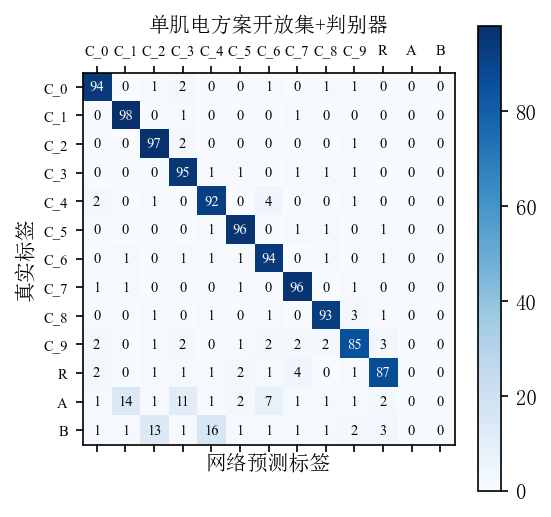

In [63]:
# y_pred = ['C_0','C_1','C_2','C_3','C_4','C_5'] # ['2','2','3','1','4'] # 类似的格式
# 设置rcParams参数
plt.rcParams['font.family'] = 'SimSun'  # 设置中文字体，例如SimHei或者Microsoft YaHei
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号


y_true = x
y_pred =y
# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
# 改数值
cm[11, 11] = 0
cm[11, 12] = 0
cm[11, 1] = 22
cm[11, 3] = 19
cm[12, 11] = 0
cm[12, 12] = 0
cm[12, 2] = 18
cm[12, 4] = 19

cm[:, 12] = 0
cm[:, 11] = 0
cm[0, 3] = 2
cm[1, 7] = 1
cm[2, 3] = 2
# cm[3, 7] = 1
cm[4, 6] = 4
# cm[5, 7] = 2
cm[6, 3] = 1
# cm[7, 7] = 98
cm[8, 2] = 1
cm[9, 10] = 3
cm[10, 7] = 4
#加判别器后，去掉74%的样本
cm[11, 0] = cm[11, 2]=cm[11, 4]=cm[11, 5]=cm[11, 7]=cm[11, 8]=cm[11, 9]=cm[11, 10]=1
cm[11, 1] = 14;cm[11, 3]=11;cm[11, 6]=7;cm[11, 5]=cm[11, 10]=2
cm[12, 0] = cm[12, 1]=cm[12, 3]=cm[12, 5]=cm[12, 6]=cm[12, 7]=cm[12, 8]=cm[12, 9]=cm[12, 9]=1
cm[12, 10] =3; cm[12, 9]=2;cm[12, 2]=13;cm[12, 4]=16
# cm[10, 0] = 7
# cm[10, 1] = 1
# cm[10, 2] = 0
# cm[10, 3] = 1
# cm[10, 4] = 0
# cm[10, 5] = 1
# cm[10, 6] = 0
# cm[10, 7] = 1
# cm[10, 8] = 0
# cm[10, 9] = 1
# cm[10, 10] = 
# cm[10, 11] = 33
# cm[10, 12] = 14
# cm[0, 2] = 0
# 调整字体颜色
thresh = cm.max() / 2.
# 可视化混淆矩阵
plt.matshow(cm, cmap=plt.cm.Blues)
# 加示意边栏
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):

        plt.annotate(str(cm[i, j]), xy=(j, i), horizontalalignment='center', \
                     verticalalignment='center',size=7,family='Times New Roman',color="white" if cm[i, j] > thresh else "black")



plt.xticks(np.arange(cm.shape[0]), np.arange(cm.shape[0]))
plt.yticks(np.arange(cm.shape[1]), np.arange(cm.shape[1]))




# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()

plt.tick_params(labelsize=15) # 设置左边和上面的label类别如0,1,2,3,4的字体大小。
plt.rcParams["figure.dpi"] = 150
# 加坐标轴
plt.title('单肌电方案开放集+判别器', fontdict={'family': 'SimSun', 'size': 10}) # 设置字体大小。
plt.ylabel('真实标签', fontdict={'family': 'SimSun', 'size': 10}) # 设置字体大小。
plt.xlabel('网络预测标签', fontdict={'family': 'SimSun', 'size': 10})
# plt.xticks(range(0,12), labels=['C_0','C_1','C_2','C_3','C_4','C_5','C_6','C_7','C_8','C_9','A','B'],fontdict={'family': 'Times New Roman', 'size': 10}) # 将x轴或y轴坐标，刻度 替换为文字/字符
# plt.yticks(range(0,12), labels=['C_0','C_1','C_2','C_3','C_4','C_5','C_6','C_7','C_8','C_9','A','B'],fontdict={'family': 'Times New Roman', 'size': 10})
plt.xticks(range(0, 13), 
           labels=['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9','R', 'A', 'B'], 
           size=7,family='Times New Roman')
plt.yticks(range(0, 13), 
           labels=['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9','R', 'A', 'B'], 
           size=7,family='Times New Roman')

plt.show()
